# **0. Load Dataset**

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=65c750287db944fd926df7b950604b7d2133bdc30ea8fca555cc931be9b6ddb3
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/flight.csv')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# **1. Data Understanding**

## **1.1 Statistical Summary**

### **1.1.1 Tipe Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- Feature seharusnya memiliki tipe data *datetime* : `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE`
- Feature `AGE` sebaiknya *integer*

In [ ]:
# jumlah record dan feature
print('Total Record :', data.shape[0])
print('Total Features :', data.shape[1])

Total Record : 62988
Total Features : 23


In [ ]:
# sampling dataset
data.sample(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
7882,23542,5/18/2011,5/18/2011,Male,4,guangzhou,guangdong,CN,42.0,3/31/2014,...,10989.0,37305,1/19/2014,73,22.642857,119,0,0.691841,20771,0
6126,56976,12/3/2007,1/19/2009,Female,4,guangzhou,guangdong,CN,32.0,3/31/2014,...,7936.0,40734,3/2/2014,30,23.300000,112,1,0.742390,35923,32
54336,44973,7/23/2006,7/23/2006,Male,4,chengdu,sichuan,CN,39.0,3/31/2014,...,0.0,2151,9/22/2012,557,169.000000,169,1,0.979126,2036,1


### **1.1.2 Missing Value**

In [ ]:
# cek data yang hilang
counts = data.isna().sum().sort_values(ascending=False)

# persentase data yang hilang
percents = round(data.isna().mean() * 100, 2).sort_values(ascending=False)
null = pd.concat([counts, percents], axis=1, keys=["null_counts", "percents(%)"])
null

,null_counts,percents(%)
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04
GENDER,3,0.00
MEMBER_NO,0,0.00
LAST_FLIGHT_DATE,0,0.00
Points_Sum,0,0.00


In [ ]:
# Persentase record/rows yang mengandung missing value
data_nan = data[data.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(data_nan)/len(data)*100, 2)}%')

Persentase missing value pada dataset : 7.51%


- Terdapat 5 feature yang memiliki missing value yaitu : `WORK_PROVINCE`, `WORK_CITY`, `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`
- Dataset memiliki 7.51% missing value (masih dibawah 10%)

### **1.1.3 Duplikat Data**

In [ ]:
# cek duplikat
data.duplicated().sum()

0

Tidak terdapat duplikat di dataset

##Pengelompokan Data Berdasarkan Tipe Data

In [ ]:
# cek feature yang memiliki nilai numerik
numeric = data_nan.loc[:, (data_nan.dtypes == int) | (data_nan.dtypes == float)].columns.tolist()
print(numeric)
print(f'Jumlah feature numerikal : {len(numeric)}')

['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Jumlah feature numerikal : 15


In [ ]:
# cek data yang memiliki nilai kategorik
category = data_nan.loc[:, (data_nan.dtypes == object)].columns.tolist()
print(category)
print(f'Jumlah feature kategorikal : {len(category)}')

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah feature kategorikal : 8


In [ ]:
# split data berdasarkan kategori
numeric = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
category = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

### **1.1.5 Statistika Deskriptif**

In [ ]:
# analisis deskriptif data numerikal
data[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


**Observasi :**
- Terdapat nilai 0 yaitu `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `AVG_INTERVAL`, `MAX_INTERVAL`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight`.
- `MEMBER_NO`, `FFP_TIER` dan `avg_discount` memiliki nilai mean yang hampir sama dengan median yang menandakan fitur tersebut cenderung mendekati distribusi normal.

In [ ]:
# analisis deskriptif data kategorikal
data[category].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [ ]:
# Jumlah category
for col in category:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(data[col].value_counts())
    print()

Value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
--------------------------------------------------
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
--------------------------------------------------
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  

### **1.1.6 Summary**

**Hasil :**
- Dataset memiliki 15 feature numerikal dan 8 feature kategorikal.
- Rekomendasi tipe data feature `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` sebaiknya menggunakan datetime dan `AGE` menggunakan integer.
- Dataset memiliki missing value dibawah 10%
- Tidak terdapat record yang duplikat.
- Nilai 0 pada feature `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight` kemungkinan mempresentasikan user tidak mendapat atau melakukan action dari feature tersebut.
- Nilai 0 pada feature `SUM_YR_1`, `SUM_YR_2`,  ` AVG_INTERVAL`, `MAX_INTERVAL` kemungkinan user tidak melakukan penerbangan, hal tersebut dapat dianalisis lebih lanjut.
- Mayoritas user adalah Laki-laki berasal dari China, provinsi Guangdong, kota Guangzhou

## **1.2 Univariate Analysis**

### **1.2.1 Feature Numerikal**

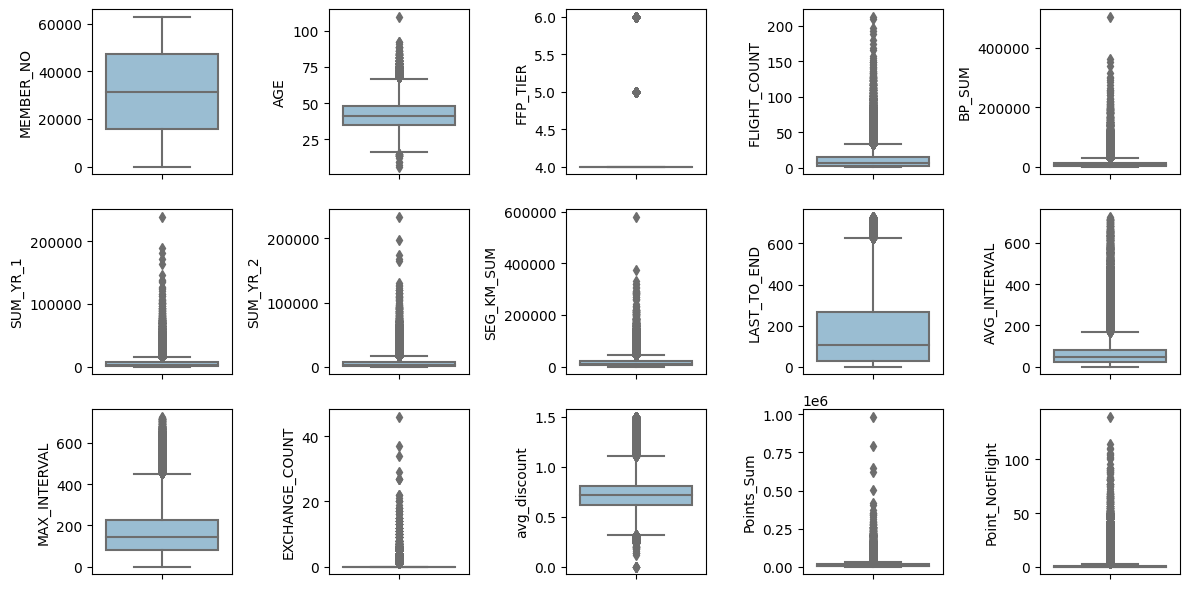

In [ ]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=data[numeric[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

### **1.2.2 Feature Kategorikal**

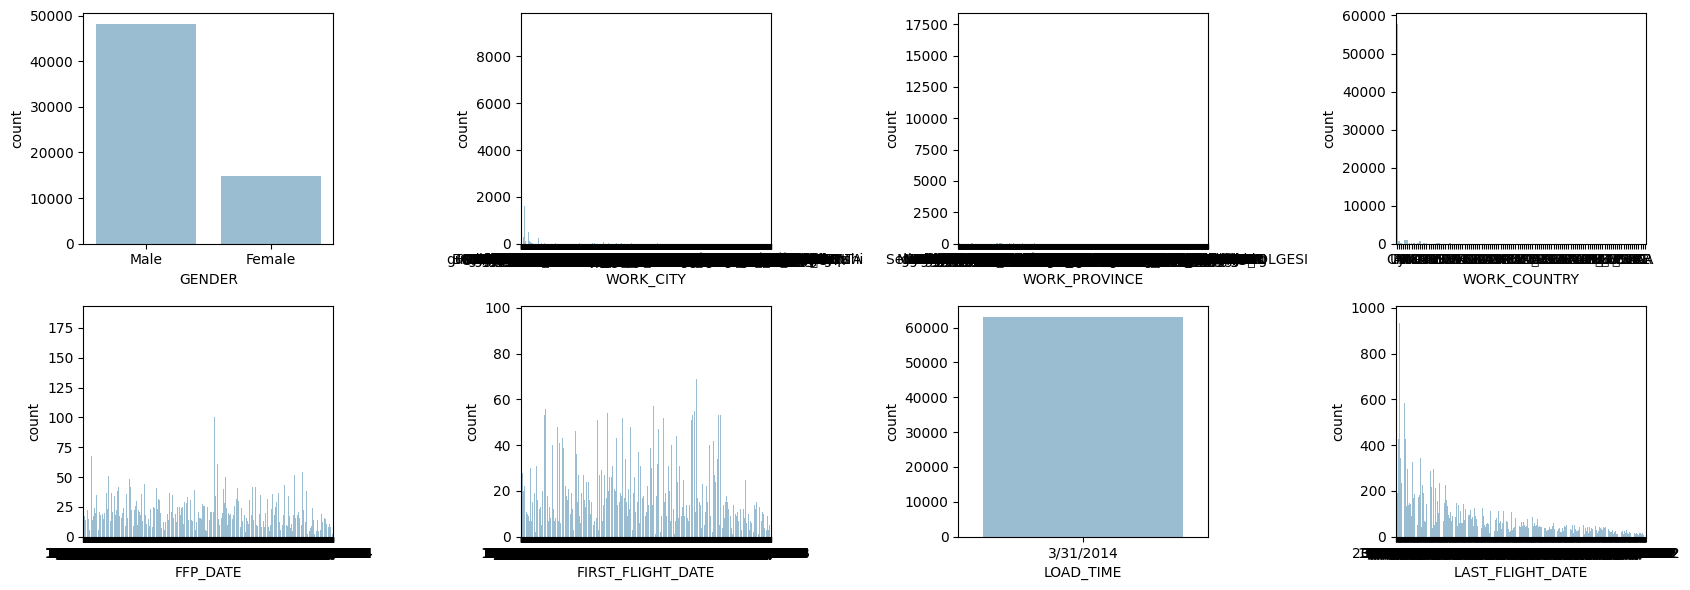

In [ ]:
# countplot feature kategorikal
plt.figure(figsize=(17, 6))
for i in range(0, len(category)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=data[category[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

Tidak terlalu banyak insight yang didapatkan dalam `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY` maka diputuskan untuk membuat visualisasi top 10 untuk kolom tersebut


Text(0, 0.5, 'count')

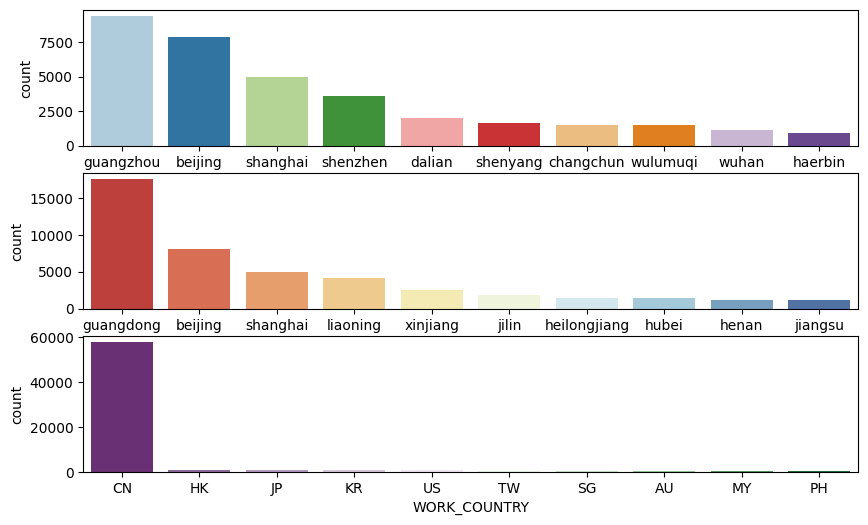

In [ ]:
# membuat grafik dengan format 3 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,6))

# work_city
work_city_top10 = data['WORK_CITY'].value_counts().head(10)
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0], palette=('Paired'))
ax[0].set_xlabel('WORK_CITY')
ax[0].set_ylabel('count')

# work_province
work_province_top10 = data['WORK_PROVINCE'].value_counts().head(10)
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1], palette=('RdYlBu'))
ax[1].set_xlabel('WORK_PROVINCE')
ax[1].set_ylabel('count')

# work_country
work_country_top10 = data['WORK_COUNTRY'].value_counts().head(10)
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[2], palette=('PRGn'))
ax[2].set_xlabel('WORK_COUNTRY')
ax[2].set_ylabel('count')


Visualisasi `FFP_DATE`, `FIRST_FLIGHT_DATE` dan `LAST_FLIGHT_DATE` per tahun

Text(0.5, 0, 'FIRST FLIGHT DATE YEAR')

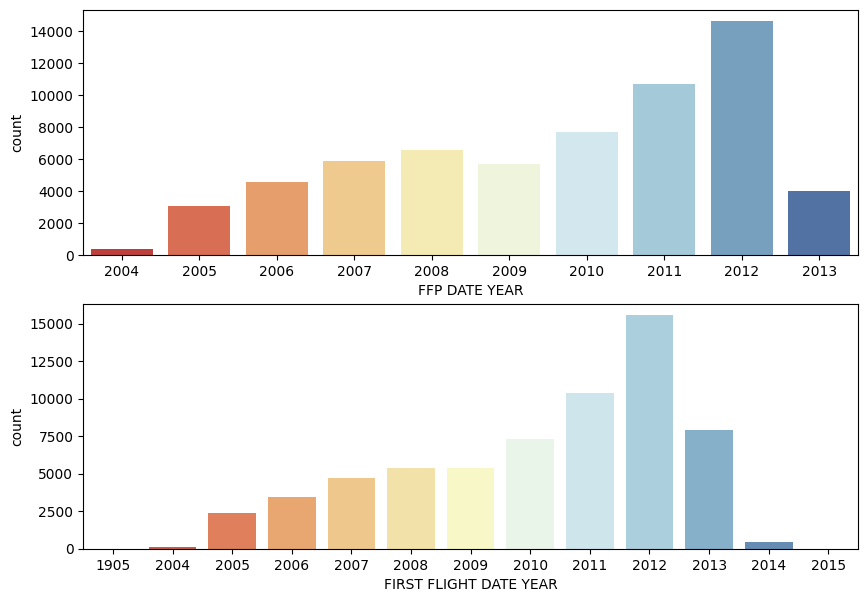

In [ ]:
# membuat grafik dengan format 2 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))

# mengubah tipe object ke datetime

# FFP
FFP = pd.to_datetime(data['FFP_DATE']).dt.year
sns.countplot(x=FFP,ax=ax[0], palette=('RdYlBu'))
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

# FFD
FFD = pd.to_datetime(data['FIRST_FLIGHT_DATE']).dt.year
sns.countplot(x=FFD, ax=ax[1], palette=('RdYlBu'))
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')


Pada feature `LAST_FLIGHT_DATE` ditemukan nilai tanggal 2014/2/29 yang tidak masuk akal karena 2014 bukanlah tahun kabisat.

In [ ]:
# mengcopy dataset untuk analisis sementara
data_last = data.copy()

# drop data yang memilik tanggal 2014/2/29
data_last.drop(data_last[data_last.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

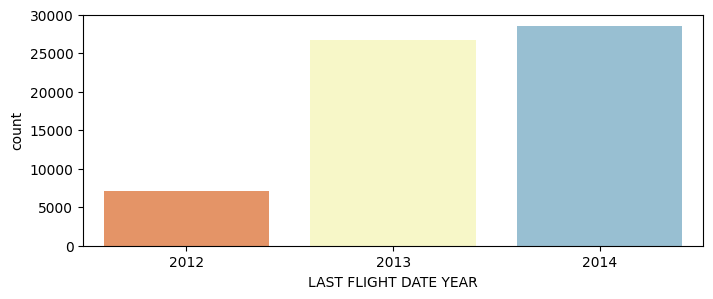

In [ ]:
# membuat visualisasi
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,3))
# mengubah tipe object ke datetime
LFD = pd.to_datetime(data_last['LAST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=LFD, palette='RdYlBu')
ax.set_xlabel('LAST FLIGHT DATE YEAR')

### **1.2.3 Summary**

**Hasil :**
- Mayoritas feature memiliki outlier, kecuali MEMBER_NO dan FFP_TIER
- Moyaritas feature memiliki distribusi yang positively skew, kecuali pada MEMBER_NO dan avg_discount cenderung mendekati normal.
- Mayoritas user adalah laki-laki
- Mayoritas feature kategorikal memiliki nilai unik
- LOAD_TIME memiliki 1 nilai yaitu 2014-03-31
- Mayoritas user yang bergabung menjadi membership pada tahun 2012
- Terdapat nilai tahun yang sangat jauh pada featur `FIRST FLIGHT DATE` yaitu 1905
- Pada feature `LAST_FLIGHT_DATE` terdapat nilai tanggal yang tidak masuk akal yaitu tanggal 2014/2/29, tahun tersebut bukan tahun kabisat sehingga tidak ada tanggal 29 di bulan Februari.


## **1.3 Multivariate Analysis**

### **1.3.1 Korelasi Antar Feature**

<Axes: >

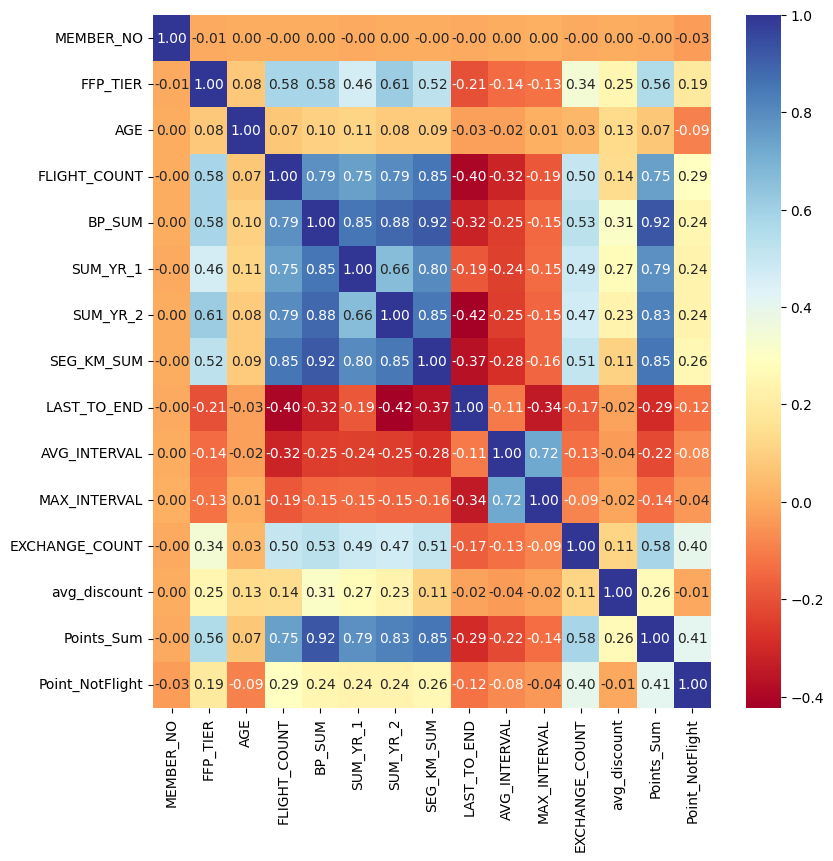

In [ ]:
# heatmap korelasi antar feature
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), cmap='RdYlBu', annot=True, fmt='.2f')

### **1.3.2 Summary**

Feature yang memiliki korelasi tinggi :
- Antara feature-feature `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `Points_Sum`
- `AVG_INTERVAL` dengan `MAX_INTERVAL`
- Feature  `FLIGHT_COUNT`, `BP_SUM`,`SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM` saling memiliki kaitan. Semakin sering pelanggan terbang, semakin jauh jarak penerbangan yang ditempuh dan semakin banyak pendapatan tarif.


# **2. Feature Enginering**

## **2.1 Data Cleaning**

### **2.1.1 Fixing Datatype**

Sebelum memperbaiki tipe dataset, diputuskan untuk menghapus feature-feature yang tidak relate dan memiliki banyak nilai unik yaitu `MEMBER_NO`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `GENDER`.

In [ ]:
# drop kolom
data_pre = data.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

Menghapus tanggal 2014/2/29 yang ditemukan pada `LAST_FLIGHT_DATE`.

In [ ]:
# menghapus record
data_pre.drop(data_pre[data_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Mengubah tipe yang memiliki feature tanggal dengan datetime.

In [ ]:
# feature yang meiliki type datetime
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

# inisialisasi
for col in date_feature:
  data_pre[col] = pd.to_datetime(data_pre[col], errors='coerce')

In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62567 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 2   FFP_TIER           62567 non-null  int64         
 3   LOAD_TIME          62567 non-null  datetime64[ns]
 4   FLIGHT_COUNT       62567 non-null  int64         
 5   BP_SUM             62567 non-null  int64         
 6   SUM_YR_1           62016 non-null  float64       
 7   SUM_YR_2           62429 non-null  float64       
 8   SEG_KM_SUM         62567 non-null  int64         
 9   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 10  LAST_TO_END        62567 non-null  int64         
 11  AVG_INTERVAL       62567 non-null  float64       
 12  MAX_INTERVAL       62567 non-null  int64         
 13  EXCHANGE_COUNT     62567 non-null  int64         
 14  avg_di

### **2.1.2 Handling Missing Value**

In [ ]:
data_pre.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
# Persentase record/rows yang mengandung missing value
data_nan = data_pre[data_pre.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(data_nan)/len(data_pre)*100, 2)}%')

Persentase missing value pada dataset : 1.1%


Dikarenakan missing value hanya sebesar 1.1%, diputuskan untuk menghapusnya karena tidak terlalu signifikan mempengaruhi hasil dalam pemodelan.

In [ ]:
# Menghapus baris data dari missing value SUM_YR_1, SUM_YR_2
data_pre = data_pre.dropna()

In [ ]:
# cek missing value
data_pre.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

Membersihkan data sesuai dengan prosedur standar untuk dataset penerbangan (Tao, 2020)
- Record di mana harga tiket (SUM_YR_1,SUM_YR_2) berisi nilai 0, dan diskon rata-rata (avg_discount) bukan nol, dan dimana total jarak tempuh (SEG_KM_SUM) lebih dari nol.
- Hal ini diasumsikan bahwa user tidak memiliki riwayat perjalanan

In [ ]:
# drop kolom
data_pre.drop(data_pre[(data_pre['SUM_YR_1'] == 0) & (data_pre['SUM_YR_2'] == 0) & (data_pre['avg_discount'] == 0) & (data_pre['SEG_KM_SUM'] > 0)].index, inplace = True)

In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61871 entries, 0 to 62978
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61871 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61871 non-null  datetime64[ns]
 2   FFP_TIER           61871 non-null  int64         
 3   LOAD_TIME          61871 non-null  datetime64[ns]
 4   FLIGHT_COUNT       61871 non-null  int64         
 5   BP_SUM             61871 non-null  int64         
 6   SUM_YR_1           61871 non-null  float64       
 7   SUM_YR_2           61871 non-null  float64       
 8   SEG_KM_SUM         61871 non-null  int64         
 9   LAST_FLIGHT_DATE   61871 non-null  datetime64[ns]
 10  LAST_TO_END        61871 non-null  int64         
 11  AVG_INTERVAL       61871 non-null  float64       
 12  MAX_INTERVAL       61871 non-null  int64         
 13  EXCHANGE_COUNT     61871 non-null  int64         
 14  avg_di

## **2.2 Feature Selection**

Menggunakan LRFMC model. Penjelasan LRFMC menurut Tao (2020) adalah sebagai berikut:
- L (LOYALTY) : Lama waktu user menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.
- R (RECENCY) : Jumlah bulan sejak penerbangan terakhir anggota dari akhir waktu observasi.
- F (FREQUENCY) : Total berapa kali user telah terbang selama periode observasi.
- M (MONETERY) : Miles atau jarak yang terakumulasi selama waktu observasi user.
- C (DISCOUNT) : Nilai rata-rata discount factor yang digunakan user selama periode observasi.

Maka feature yang diambil :
- FPP_DATE (Frequent Flyer Program Join Date)
- LOAD_TIME (Tanggal Data Diambil)
- FLIGHT_COUNT (Jumlah Penerbangan Customer)
- AVG_DISCOUNT (Rata-rata Discount yang Diadapat Customer)
- SEG_KM_SUM (Total Jarak (km) Penerbangan yang Sudah Dilakukan)
- LAS_TO_END (Jarak Waktu Penerbangan Terakhir ke Pesanan Penerbangan Paling Terakhir)

In [ ]:
# select feature
data_feats = data_pre[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data_feats['TIME_MONTH'] = ((data_pre['LOAD_TIME'] - data_pre['FFP_DATE']).dt.days/30).astype(int)
data_feats = data_feats[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()
data_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61871 entries, 0 to 62978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61871 non-null  int64  
 1   LAST_TO_END   61871 non-null  int64  
 2   FLIGHT_COUNT  61871 non-null  int64  
 3   SEG_KM_SUM    61871 non-null  int64  
 4   avg_discount  61871 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.8 MB


In [ ]:
data_feats.sample(3)

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
15631,96,9,8,16536,0.930653
18703,19,1,15,16693,0.784047
42377,81,288,6,5880,0.703333


## **2.3 Handling Outliers**

In [ ]:
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']

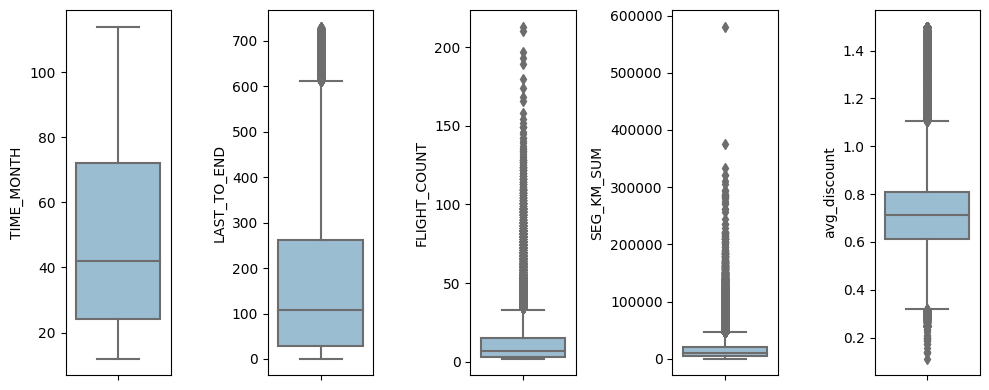

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=data_feats[lrfmc[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data_feats)}')

fil_ent = np.array([True] * len(data_feats))
for col in lrfmc:
    Q1 = data_feats[col].quantile(0.25)
    Q3 = data_feats[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((data_feats[col] >= low_limit) & (data_feats[col] <= high_limit)) & fil_ent

data_feats = data_feats[fil_ent].reset_index()
print('Jumlah baris setelah memfilter outlier', len(data_feats))

Jumlah baris sebelum memfilter outlier: 61871
Jumlah baris setelah memfilter outlier 51941


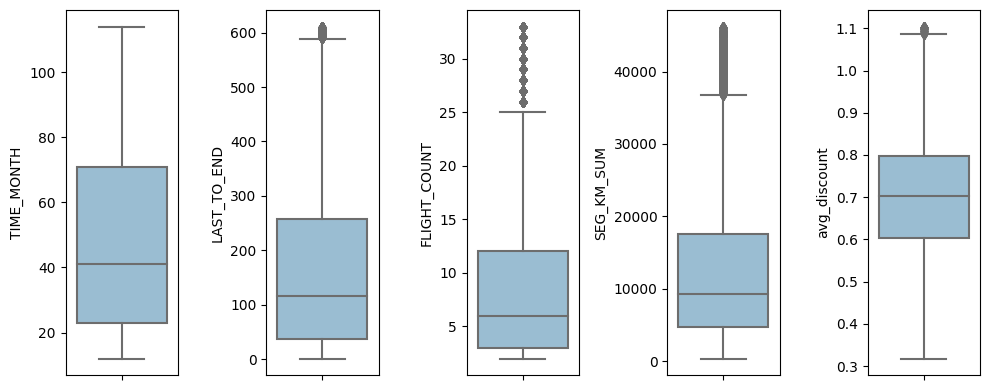

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=data_feats[lrfmc[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

In [ ]:
data_feats=data_feats.drop(columns='index')

# **3. Modeling and Evaluation**

## **3.1 Scalling**

In [ ]:
# melihat statistical summary dataset
data_feats.describe()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,51941.000000,51941.000000,51941.000000,51941.000000,51941.000000
mean,47.767544,169.788163,8.799503,12452.171175,0.699237
std,27.861771,161.301486,7.018834,9920.505724,0.144756
min,12.000000,1.000000,2.000000,368.000000,0.317766
25%,23.000000,37.000000,3.000000,4749.000000,0.603592
50%,41.000000,116.000000,6.000000,9288.000000,0.702210
75%,71.000000,258.000000,12.000000,17566.000000,0.796756
max,114.000000,611.000000,33.000000,46205.000000,1.104105


In [ ]:
# mengganti nama feature
data_feats.columns =['L', 'R', 'F', 'M', 'C']

In [ ]:
# Standardisasi menggunakan StandardScaler
features = ['L', 'R', 'F', 'M', 'C']
X = data_feats[features].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = features)

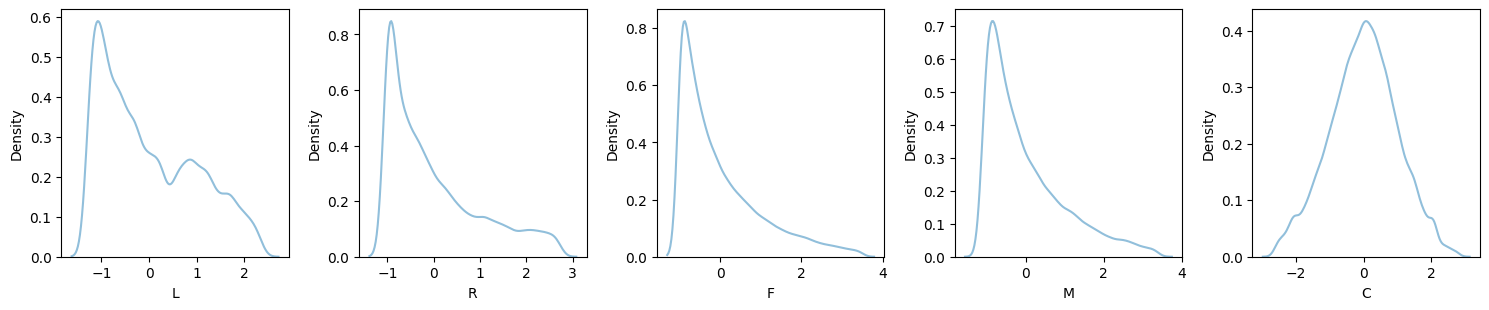

In [ ]:
# melihat distribusi data yang telah dilakukan standardisasi
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(df_std[features[i]], color='#91bfdb')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# melihat summary statistic
df_std.describe()

,L,R,F,M,C
count,5.194100e+04,5.194100e+04,5.194100e+04,5.194100e+04,5.194100e+04
mean,-6.456868e-17,8.317321e-17,1.575914e-16,-8.755075e-18,3.677132e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.283762e+00,-1.046424e+00,-9.687604e-01,-1.218112e+00,-2.635297e+00
25%,-8.889522e-01,-8.232376e-01,-8.262852e-01,-7.764972e-01,-6.607376e-01
50%,-2.428995e-01,-3.334667e-01,-3.988597e-01,-3.189557e-01,2.053675e-02
75%,8.338551e-01,5.468808e-01,4.559913e-01,5.154856e-01,6.736877e-01
max,2.377203e+00,2.735350e+00,3.447970e+00,3.402362e+00,2.796927e+00


In [ ]:
df_std=df_std.copy()

## **3.2 Best K**

In [ ]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

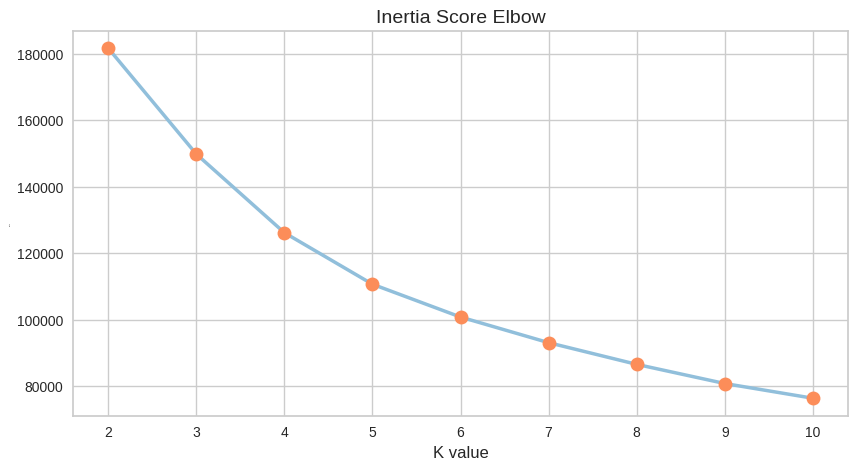

In [ ]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow', fontsize=14)
plt.xlabel('K value',fontsize=12)
plt.ylabel('Inertia',fontsize=1)

Berdasarkan grafik yang dihasilkan tidak terlalu terlihat penurunaan nilai dan patahan yang tajam, sehingga nilai k yang optimal tidak terlalu diketahui dengan pasti.

In [ ]:
# analisa lebih lanjut dengan persentase dari inertia
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    17.529278
1    15.792936
2    12.282761
3     8.921384
4     7.650363
5     7.009144
6     6.660237
7     5.476228
8          NaN
dtype: float64

Dari selisih nilai yang dihasilkan, nilai k optimal diantara 2-4.

## **3.3 Silhouette Score**

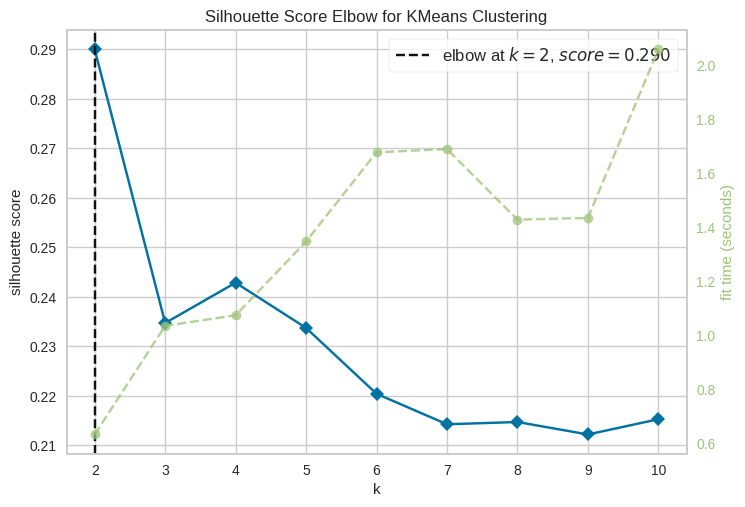

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

Dari grafik diatas diketahui k optimal = 2 atau 4

## **3.3 Clustering**

In [ ]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_

In [ ]:
df_std.head()

,L,R,F,M,C,cluster
0,1.192773,-0.953430,2.735594,3.397020,2.758218,0
1,1.515800,-0.953430,2.878069,3.158925,2.765579,0
2,0.869747,-0.383064,-0.113909,3.341780,2.372683,0
3,-0.135224,-1.009226,2.878069,3.183420,2.487433,0
4,1.085098,1.650415,-0.398860,3.327265,2.213935,0


In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca

,PC 1,PC 2,cluster
0,4.870365,0.652128,0
1,4.828038,0.845180,0
2,2.939603,-0.081312,0
3,4.777569,-0.118169,0
4,2.177944,-1.055745,0
...,...,...,...
51936,-1.404577,-0.999489,1
51937,-1.453354,-1.943784,1
51938,-1.529242,-1.803192,1
51939,-1.703573,2.212287,3


Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

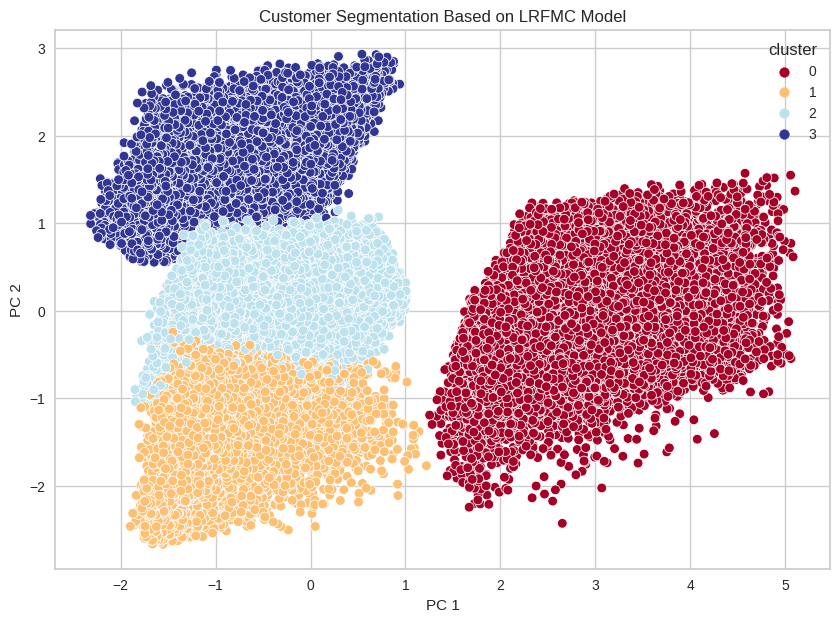

In [ ]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='RdYlBu')
plt.title('Customer Segmentation Based on LRFMC Model')

# **4. Insight**

In [ ]:
# menambahkan cluster ke dataframe
data_feats['cluster'] = kmeans.labels_
display(data_feats.groupby('cluster').agg(['mean','median','min','max']))

L                           R                           F  \
              mean median min  max        mean median  min  max       mean   
cluster                                                                      
0        53.185223   49.0  12  114   63.507659   35.0    1  581  19.935550   
1        38.732854   32.0  12  114  430.080806  425.0  189  611   3.913782   
2        28.367571   26.0  12   63  107.818798   95.0    1  373   6.549849   
3        81.195528   80.0  46  114  127.871043  109.0    1  560   6.699967   

                                   M                               C  \
        median min max          mean   median   min    max      mean   
cluster                                                                
0         19.0   3  33  27885.327947  26881.5  4600  46205  0.720729   
1          3.0   2  21   5875.974340   4558.0   368  40582  0.714489   
2          6.0   2  22   9265.484173   8279.0   368  36696  0.673839   
3          6.0   2  24   9474.916346   8505.0   368  38663  0.705790   

                                       
           median       min       max  
cluster                                
0        0.716780  0.339656  1.104105  
1        0.723953  0.317961  1.104000  
2        0.679227  0.317898  1.104079  
3        0.708328  0.317766  1.103835

In [ ]:
# persentase customer setiap cluster
cluster_count = data_feats['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_std))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

,cluster,count,percentage (%)
0,0,10706,20.61
1,1,10717,20.63
2,2,18576,35.76
3,3,11942,22.99


Text(0, 0.5, 'Percentage')

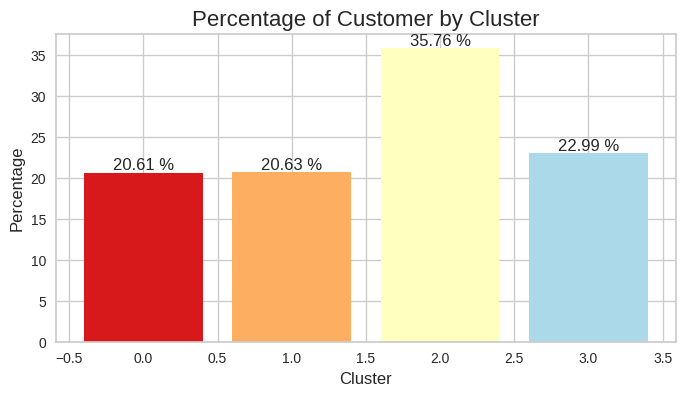

In [ ]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(8,4))

c = ["#d7191c","#fdae61","#ffffbf","#abd9e9","#2c7bb6"]
bars = plt.bar(x=cluster_count['cluster'], height= cluster_count['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage of Customer by Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

## **4.2 Segmentation Analysis**

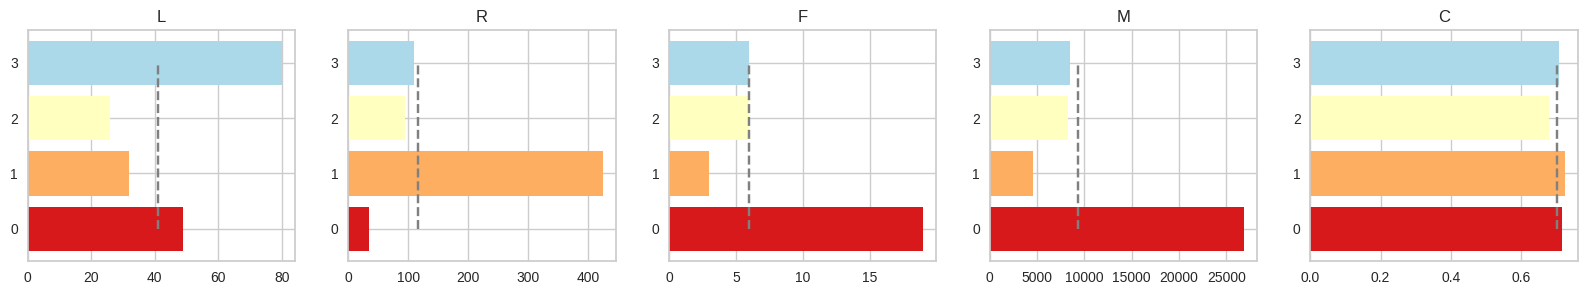

In [ ]:
# melihat rata-rata variabel LRFMC antar cluster
LRFMC= ['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*4,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(data_feats[col].median(), ymin=0, ymax=3, color='grey', linestyle='--')
        g = data_feats.groupby('cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c)
        plt.title(col)
        i = i+1

dist_list(LRFMC)

Secara keseluruhan cluster-cluster ini terbentuk karena adanya penbedaan indikator model LRFMC. Berdasarkan hasil analisis dan visualisai dapat diketahui karakteristik customer pada setiap kelompok sebagai berikut:

<p style="text-align: center;">
Akumulasi Hasil Nilai LRFMC pada Setiap Cluster
</p>

|  Cluster  | High Value | Average Value | Low Value |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** | F M C | L | R |
| **Cluster 1** | R C | L  | F M |
| **Cluster 2** | C | R F M | L |
| **Cluster 3** | L C | R F M |  |

**Interpretasi :** <br>

1. Cluster 0 - **Potential Loyalist - The Campions**
    - Kelompok customer yang memliki aktivitas penerbangan yang sangat tinggi, walupun rentang waktu untuk melakukan setiap penerbangan tidak terlalu jauh, kelompok ini sudah menjadi member belum cukup lama, sering menggunakan maskapai dan dengan jarak yang jauh sehingga sangat berpotensi untuk menghasilkan revenue. Kelompok ini juga memiliki tingkat recency yang rendah, artinya rentang waktu untuk melakukan setiap penerbangan tidak terlalu jauh.

2. Cluster 1 - **Price Sensitive**
    - Kelompok yang memiliki tingkat diskon tertinggi, tetapi dengan frekuensi yang paling rendah. Artinya kelompok ini loyalitas dan pembelianya/ penerbanganya hanya tergantung pada harga tiket yang mereka beli. Maka kelompok ini mudah dipengaruhi melalui diskon dan penawaran

3. Cluster 2 - **Can't Lose Them**
    - Kelompok yang menjadi member belum terlalu lama tetapi memiliki aktivitas dan penggunaan maskapai yang hampir sama dengan kelompok yang sudah menjadi member sudah cukup lama. Kelompok ini juga memiliki tingkat diskon yang didapatkan rendah. Artinya kelompok ini berpotensi menggunakan maskapai secara konsisten dan berkelanjutan

4. Cluster 3 - **Loyal Customers**
    - Kelompok customer yang telah menjadi member dalam jangka waktu paling lama dan memiliki aktivitas penerbangan sedang, rentang waktu untuk melakukan penerbangan tidak terlalu jauh dan cukup sering menggunakan maskapai.